In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

### Load dataset

In [ ]:

housing = fetch_california_housing()
df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df['target'] = housing['target']

### Split data

In [4]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale data (important for Ridge & Lasso)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression with Cross Validation

In [6]:
model_lr = LinearRegression()

mse_scores = cross_val_score(model_lr, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

print("Linear Regression MSE (cross-val):", -np.mean(mse_scores))

Linear Regression MSE (cross-val): 0.519265201143368


In [9]:
#Ridge Regression

ridge_params = {'alpha': [1e-15, 1e-4, 2, 4, 5, 7, 9, 20]}
ridge_model = Ridge()

ridge_cv = GridSearchCV(ridge_model, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 0.0001, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.0001


In [ ]:
print("Best Ridge Alpha:", ridge_cv.best_params_)
print("Best Ridge Score:", ridge_cv.best_score_)

Best Ridge Alpha: {'alpha': 0.0001}
Best Ridge Score: -0.5192652011402483


In [11]:
## Lasso Regression

lasso_params = {'alpha': [1e-15, 1e-4, 2, 4, 5, 7, 9, 20, 100]}
lasso_model = Lasso()
lasso_cv = GridSearchCV(lasso_model, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Best Lasso Alpha:", lasso_cv.best_params_)
print("Best Lasso Score:", -lasso_cv.best_score_)


c:\Users\Abdullah\anaconda3\envs\abdullahenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+02, tolerance: 1.779e+00
  model = cd_fast.enet_coordinate_descent(


Best Lasso Alpha: {'alpha': 0.0001}
Best Lasso Score: 0.5192579643557155


In [12]:
# %% Evaluate Ridge on Test Data
y_pred_ridge = ridge_cv.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Test MSE:", mse_ridge)
print("Ridge Test R² Score:", r2_ridge)

Ridge Test MSE: 0.5558915950092097
Ridge Test R² Score: 0.5757877088453395


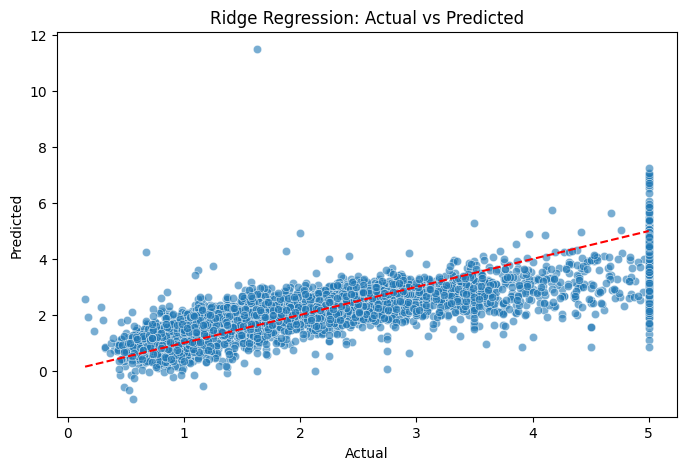

In [13]:
# %% Visualization: Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

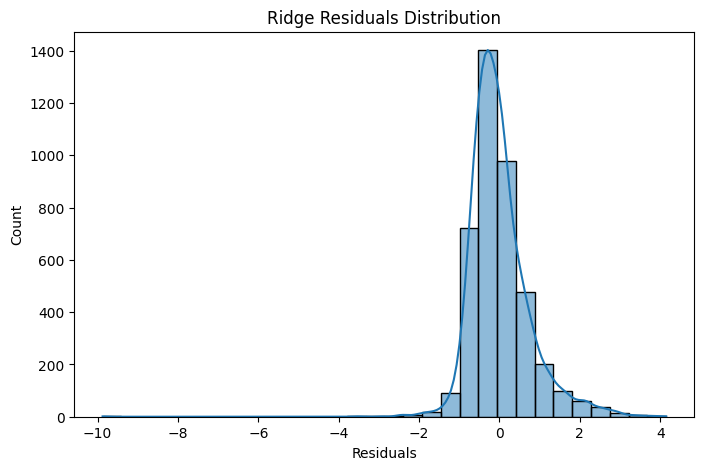

In [14]:
# %% Visualization: Residuals
residuals = y_test - y_pred_ridge
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Ridge Residuals Distribution")
plt.xlabel("Residuals")
plt.show()